# Sheetal Mahajan_20MAI0066

In [1]:
#1 import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#2 read the dataset onto a variable
train = pd.read_csv("D:\\College\\sem2\\Machine Learning Techniques\\lab\\datasets\\titanic.csv")

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#fix the predictor variables 
df = train[['Survived','Pclass', 'Sex','Age','Fare']] #needed double square bracket to take as a list of values


In [5]:
#4
#categorical
#change male to 1 and female to 0 --- feature engg. --Encoding
#lambda ==  single line and inline
df["Sex"] = df["Sex"].apply(lambda sex:1 if sex=='male' else 0)

<ipython-input-5-fecbd87e3674>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"] = df["Sex"].apply(lambda sex:1 if sex=='male' else 0)


In [6]:
#getting info of data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [7]:
#checking if any null values exist
print(df['Age'].isnull().sum())
print(df['Survived'].isnull().sum())
print(df['Pclass'].isnull().sum())
print(df['Fare'].isnull().sum())

177
0
0
0


In [8]:
#5 handaling missing values --- DATA IMPUTATION
df["Age"] = df["Age"].fillna(df["Age"].median()) #outliner

<ipython-input-8-10dcb8e46b69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = df["Age"].fillna(df["Age"].median()) #outliner


In [9]:
#6 take a look at the dataframe
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [10]:
#7 set the predictor(X) and respose(Y) variables
X = df.drop("Survived",axis=1)
Y = df["Survived"]

In [11]:
#8 splitting into training and test set
#magic..
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state = 30)

# Logistic Regreesion

In [12]:
#9 call the logistic regresssion model
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression() 
logit.fit(X_train, Y_train) #will approximate

LogisticRegression()

In [13]:
#10 compute the Predictions or Y hat
Y_pred = logit.predict(X_test)
print(Y_pred)

[1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1
 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0]


In [14]:
#10 confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred) #what is test and what predicted

In [15]:
confusion_matrix

#1st row == not survived
#2nd row == survived
#1st col ==pred. negative
#2nd col == pred. positive

#[[TN, FP],[FN, TP]]

array([[91, 17],
       [24, 47]], dtype=int64)

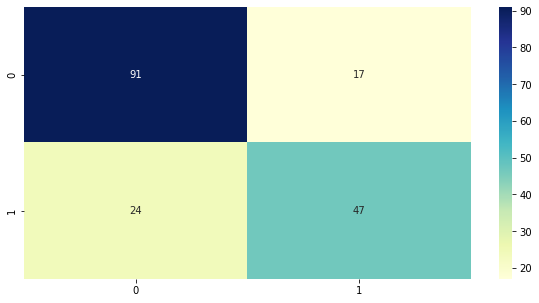

In [19]:
#11 plotting heatmap
import seaborn as sb
plt.figure(figsize=(10,5)) #size of matrix figure
confusion_m = confusion_matrix(Y_test,Y_pred)

#heatmap
sb.heatmap(confusion_m, cmap='YlGnBu', annot=True)

In [20]:
#12 Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.770949720670391

In [21]:
#13 classification report
from sklearn.metrics import classificaton_report
report = classificaton_report(Y_test,Y_pred)
print(report)

ImportError: cannot import name 'classificaton_report' from 'sklearn.metrics' (C:\Users\Sheetal\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\__init__.py)

In [22]:
#13 classification report
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       108
           1       0.73      0.66      0.70        71

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.77      0.77      0.77       179



# Bayes Classification

In [23]:
#14 fitting into Bayes classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, Y_train).predict(X_test)
print(y_pred_gnb)

[1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1
 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1]


In [24]:
#15 Classification report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_gnb)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       108
           1       0.66      0.69      0.68        71

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



In [25]:
#16 Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred_gnb)

0.7374301675977654

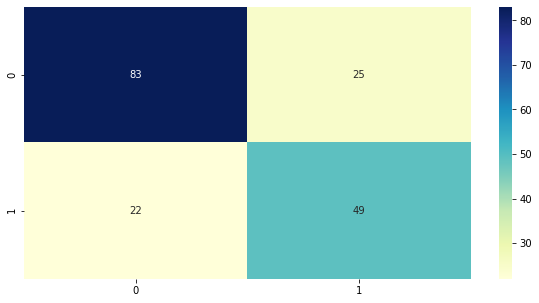

In [26]:
#17 plotting heatmap
plt.figure(figsize=(10,5)) #size of matrix figure
confusion_m = confusion_matrix(Y_test,y_pred_gnb)

#heatmap
sb.heatmap(confusion_m, cmap='YlGnBu', annot=True)

# Conclusion

While comparing the models on the basis of Accuracy, we found that the accuracy accuracy for Bayes classification is 73.74% which is lower than the accuracy of logistic regression model i.e 77.09%